# **Proyecto individual - Secondary Mushroom Dataset**

## Análisis Exploratorio de Datos

### Importación de Librerías

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from rich import print
from rich.console import Console
from rich.table import Table
import warnings

%matplotlib inline

### Carga del Dataset

In [2]:
parent_directory = os.path.dirname(os.getcwd())
path_primary_data = os.path.join(parent_directory, "data", "secondary_data.csv")
df = pd.read_csv(path_primary_data, sep=";")
print(df)

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  stem-root stem-surface stem-color veil-type  \
0            16.95  ...          s            y          w         u   
1            17.99  ...          s            y          w         u   
2            17.80  ...          s            y          w         u   
3            15.77  ...          s            y          w         u   
4            16.53  ...          s            y          w         u   
...            ...  ...        ...          ...        ...       ...   
61064         3.93  ...        NaN          NaN          y       NaN   
61065         3.18  ...        NaN          NaN          y       NaN   
61066         3.86  ...        NaN          NaN          y       NaN   
61067         3.56  ...        NaN          NaN          y       NaN   
61068         3.25  ...        NaN          NaN          y       NaN   

      veil-color has-ring ring-type spore-print-color habitat season  
0              w        t         g               NaN       d      w  
1              w        t         g               NaN       d      u  
2              w        t         g               NaN       d      w  
3              w        t         p               NaN       d      w  
4              w        t         p               NaN       d      w  
...          ...      ...       ...               ...     ...    ...  
61064        NaN        f         f               NaN       d      a  
61065        NaN        f         f               NaN       d      a  
61066        NaN        f         f               NaN       d      u  
61067        NaN        f         f               NaN       d      u  
61068        NaN        f         f               NaN       d      u  

[61069 rows x 21 columns]

### Resumen del Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

El data set contiene 61,069 entradas (filas) y 20 características (columnas), incluyendo algunas características físicas de los hongos; los hongos se clasifican (class) en venenosos ('p') o comestibles ('e').

Varios campos presentan una cantidad significativa de valores faltantes, notablemente veil-type, veil-color, spore-print-color, stem-root, y stem-surface, lo que podría afectar el análisis de estas variables.

### Distribución de la Clase Objetivo

#### Frecuencia de Clases

In [4]:
df["class"].value_counts().reset_index(name="Frecuencia").rename(columns={"class":"Clase"})

,Clase,Frecuencia
0,p,33888
1,e,27181


La distribución de clases muestra que hay más hongos venenosos (33,888) que comestibles (27,181) en este conjunto de datos.

#### Visualización de la Distribución

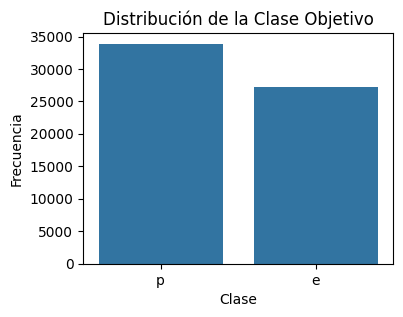

In [5]:
plt.figure(figsize=(4,3))
sns.countplot(x="class", data=df)
plt.title("Distribución de la Clase Objetivo")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

### Separación de Variables

In [6]:
def split_df_exclude_target(dataframe, target_variable):
    """
    Divide el DataFrame en dos: uno con variables categóricas y otro con variables numéricas,
    excluyendo la variable de predicción especificada.
    
    Parámetros:
    - dataframe: DataFrame de pandas.
    - target_variable: Nombre de la variable de predicción a excluir.
    
    Retorna:
    - df_numeric: DataFrame con solo variables numéricas, excluyendo la variable de predicción.
    - df_categorical: DataFrame con solo variables categóricas, excluyendo la variable de predicción.
    """
    # Excluyendo la variable de predicción
    df_excluded_target = dataframe.drop(columns=[target_variable])
    
    # Separando en numéricas y categóricas
    df_numeric = df_excluded_target.select_dtypes(include=['int64', 'float64'])
    df_categorical = df_excluded_target.select_dtypes(include=['object', 'category'])
    
    return df_numeric, df_categorical

# Uso de la función con el DataFrame 'df' y excluyendo la variable de predicción 'class'
df_num, df_cat = split_df_exclude_target(df, 'class')

# Visualización de los primeros registros de cada DataFrame
print('[bold blue]Variables Categóricas[/]')
print(df_cat.head(3))
print('[bold blue]Variables Numéricas[/]')
print(df_num.head(3))

Variables Categóricas

cap-shape cap-surface cap-color does-bruise-or-bleed gill-attachment  \
0         x           g         o                    f               e   
1         x           g         o                    f               e   
2         x           g         o                    f               e   

  gill-spacing gill-color stem-root stem-surface stem-color veil-type  \
0          NaN          w         s            y          w         u   
1          NaN          w         s            y          w         u   
2          NaN          w         s            y          w         u   

  veil-color has-ring ring-type spore-print-color habitat season  
0          w        t         g               NaN       d      w  
1          w        t         g               NaN       d      u  
2          w        t         g               NaN       d      w

Variables Numéricas

cap-diameter  stem-height  stem-width
0         15.26        16.95       17.09
1         16.60        17.99       18.19
2         14.07        17.80       17.74

### Análisis de Variables Categóricas

#### Frecuencia de Categorías

In [7]:
def print_frequency_tables_rich(dataframe):
    """
    Imprime tablas de frecuencia de las columnas de tipo 'object' o 'category' usando la librería rich.
    Nota: No olvides instalar la librería con pip install rich.
    No olvides importar las librerías con from rich import print y from rich.console import Console.

    Parámetros:
    - dataframe: DataFrame de pandas.
    """
    console = Console()
    
    for col in dataframe.select_dtypes(include=["object"]).columns:
        # Obtiene la tabla de frecuencia y la resetea el índice
        freq_df = dataframe[col].value_counts().reset_index()
        freq_df.columns = [col, 'frecuencia']

        # Crea una tabla de rich
        table = Table(show_header=True, header_style="bold magenta")
        table.add_column(col, style="dim", width=20)
        table.add_column("frecuencia", justify="right")

        # Añade las filas a la tabla
        for index, row in freq_df.iterrows():
            table.add_row(str(row[col]), str(row['frecuencia']))
        
        console.print(table)

In [8]:
# Imprime las tablas de frecuencia para variables categóricas
print_frequency_tables_rich(df_cat)

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ cap-shape            ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ x                    │      26934 │
│ f                    │      13404 │
│ s                    │       7164 │
│ b                    │       5694 │
│ o                    │       3460 │
│ p                    │       2598 │
│ c                    │       1815 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ cap-surface          ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ t                    │       8196 │
│ s                    │       7608 │
│ y                    │       6341 │
│ h                    │       4974 │
│ g                    │       4724 │
│ d                    │       4432 │
│ e                    │       2584 │
│ k                    │       2303 │
│ i                    │       2225 │
│ w                    │       2150 │
│ l                    │       1412 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ cap-color            ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ n                    │      24218 │
│ y                    │       8543 │
│ w                    │       7666 │
│ g                    │       4420 │
│ e                    │       4035 │
│ o                    │       3656 │
│ r                    │       1782 │
│ u                    │       1709 │
│ p                    │       1703 │
│ k                    │       1279 │
│ b                    │       1230 │
│ l                    │        828 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ does-bruise-or-bleed ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ f                    │      50479 │
│ t                    │      10590 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ gill-attachment      ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ a                    │      12698 │
│ d                    │      10247 │
│ x                    │       7413 │
│ p                    │       6001 │
│ e                    │       5648 │
│ s                    │       5648 │
│ f                    │       3530 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ gill-spacing         ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ c                    │      24710 │
│ d                    │       7766 │
│ f                    │       3530 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ gill-color           ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ w                    │      18521 │
│ n                    │       9645 │
│ y                    │       9546 │
│ p                    │       5983 │
│ g                    │       4118 │
│ f                    │       3530 │
│ o                    │       2909 │
│ k                    │       2375 │
│ r                    │       1399 │
│ e                    │       1066 │
│ u                    │       1023 │
│ b                    │        954 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ stem-root            ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ s                    │       3177 │
│ b                    │       3177 │
│ r                    │       1412 │
│ f                    │       1059 │
│ c                    │        706 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ stem-surface         ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ s                    │       6025 │
│ y                    │       4940 │
│ i                    │       4396 │
│ t                    │       2644 │
│ g                    │       1765 │
│ k                    │       1581 │
│ f                    │       1059 │
│ h                    │        535 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ stem-color           ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ w                    │      22926 │
│ n                    │      18063 │
│ y                    │       7865 │
│ g                    │       2626 │
│ o                    │       2187 │
│ e                    │       2050 │
│ u                    │       1490 │
│ f                    │       1059 │
│ p                    │       1025 │
│ k                    │        837 │
│ r                    │        542 │
│ l                    │        226 │
│ b                    │        173 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ veil-type            ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ u                    │       3177 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ veil-color           ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ w                    │       5474 │
│ y                    │        527 │
│ n                    │        525 │
│ u                    │        353 │
│ k                    │        353 │
│ e                    │        181 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ has-ring             ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ f                    │      45890 │
│ t                    │      15179 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ ring-type            ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ f                    │      48361 │
│ e                    │       2435 │
│ z                    │       2118 │
│ l                    │       1427 │
│ r                    │       1399 │
│ p                    │       1265 │
│ g                    │       1240 │
│ m                    │        353 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ spore-print-color    ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ k                    │       2118 │
│ p                    │       1259 │
│ w                    │       1212 │
│ n                    │       1059 │
│ g                    │        353 │
│ u                    │        182 │
│ r                    │        171 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ habitat              ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ d                    │      44209 │
│ g                    │       7943 │
│ l                    │       3168 │
│ m                    │       2920 │
│ h                    │       2001 │
│ p                    │        360 │
│ w                    │        353 │
│ u                    │        115 │
└──────────────────────┴────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ season               ┃ frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ a                    │      30177 │
│ u                    │      22898 │
│ w                    │       5267 │
│ s                    │       2727 │
└──────────────────────┴────────────┘

Hay una diversidad en las características físicas de los hongos, con varias categorías dentro de cada característica, como el color del sombrero (cap-color; 12 categorías), color de las láminas (gill-color; 12 categorías) y color del tallo (stem-color; 13 categorías). Si bien, esta observación no es de sorprender en un universo de más de 60,000 especies distintas de hongos, esta observación sí nos ayuda a confirmar la variabilidad de características físicas, lo cual podría facilitar la clasificación de clases.

#### Visualización de Frecuencias

In [9]:
def plot_categorical_frequencies(dataframe, grid_columns=2):
    """
    Visualiza la frecuencia de variables categóricas en una cuadrícula de plots.
    
    Parámetros:
    - dataframe: DataFrame de pandas que contiene las variables categóricas.
    - grid_columns: Número de columnas en la cuadrícula de impresión de plots.
    """
    # Selecciona solo las variables categóricas
    categorical_vars = dataframe.select_dtypes(include=['object', 'category']).columns
    
    # Calcula el número necesario de filas en la cuadrícula, basado en el número de variables y el número de columnas
    grid_rows = len(categorical_vars) // grid_columns + (len(categorical_vars) % grid_columns > 0)
    
    # Configura el tamaño de la figura
    plt.figure(figsize=(15, grid_rows * 4))
    
    # Itera sobre las variables categóricas para crear los plots
    for index, var in enumerate(categorical_vars, 1):
        plt.subplot(grid_rows, grid_columns, index)
        sns.countplot(y=var, data=dataframe, palette='Set2')
        plt.title(f'Frecuencia de {var}')
        plt.tight_layout()

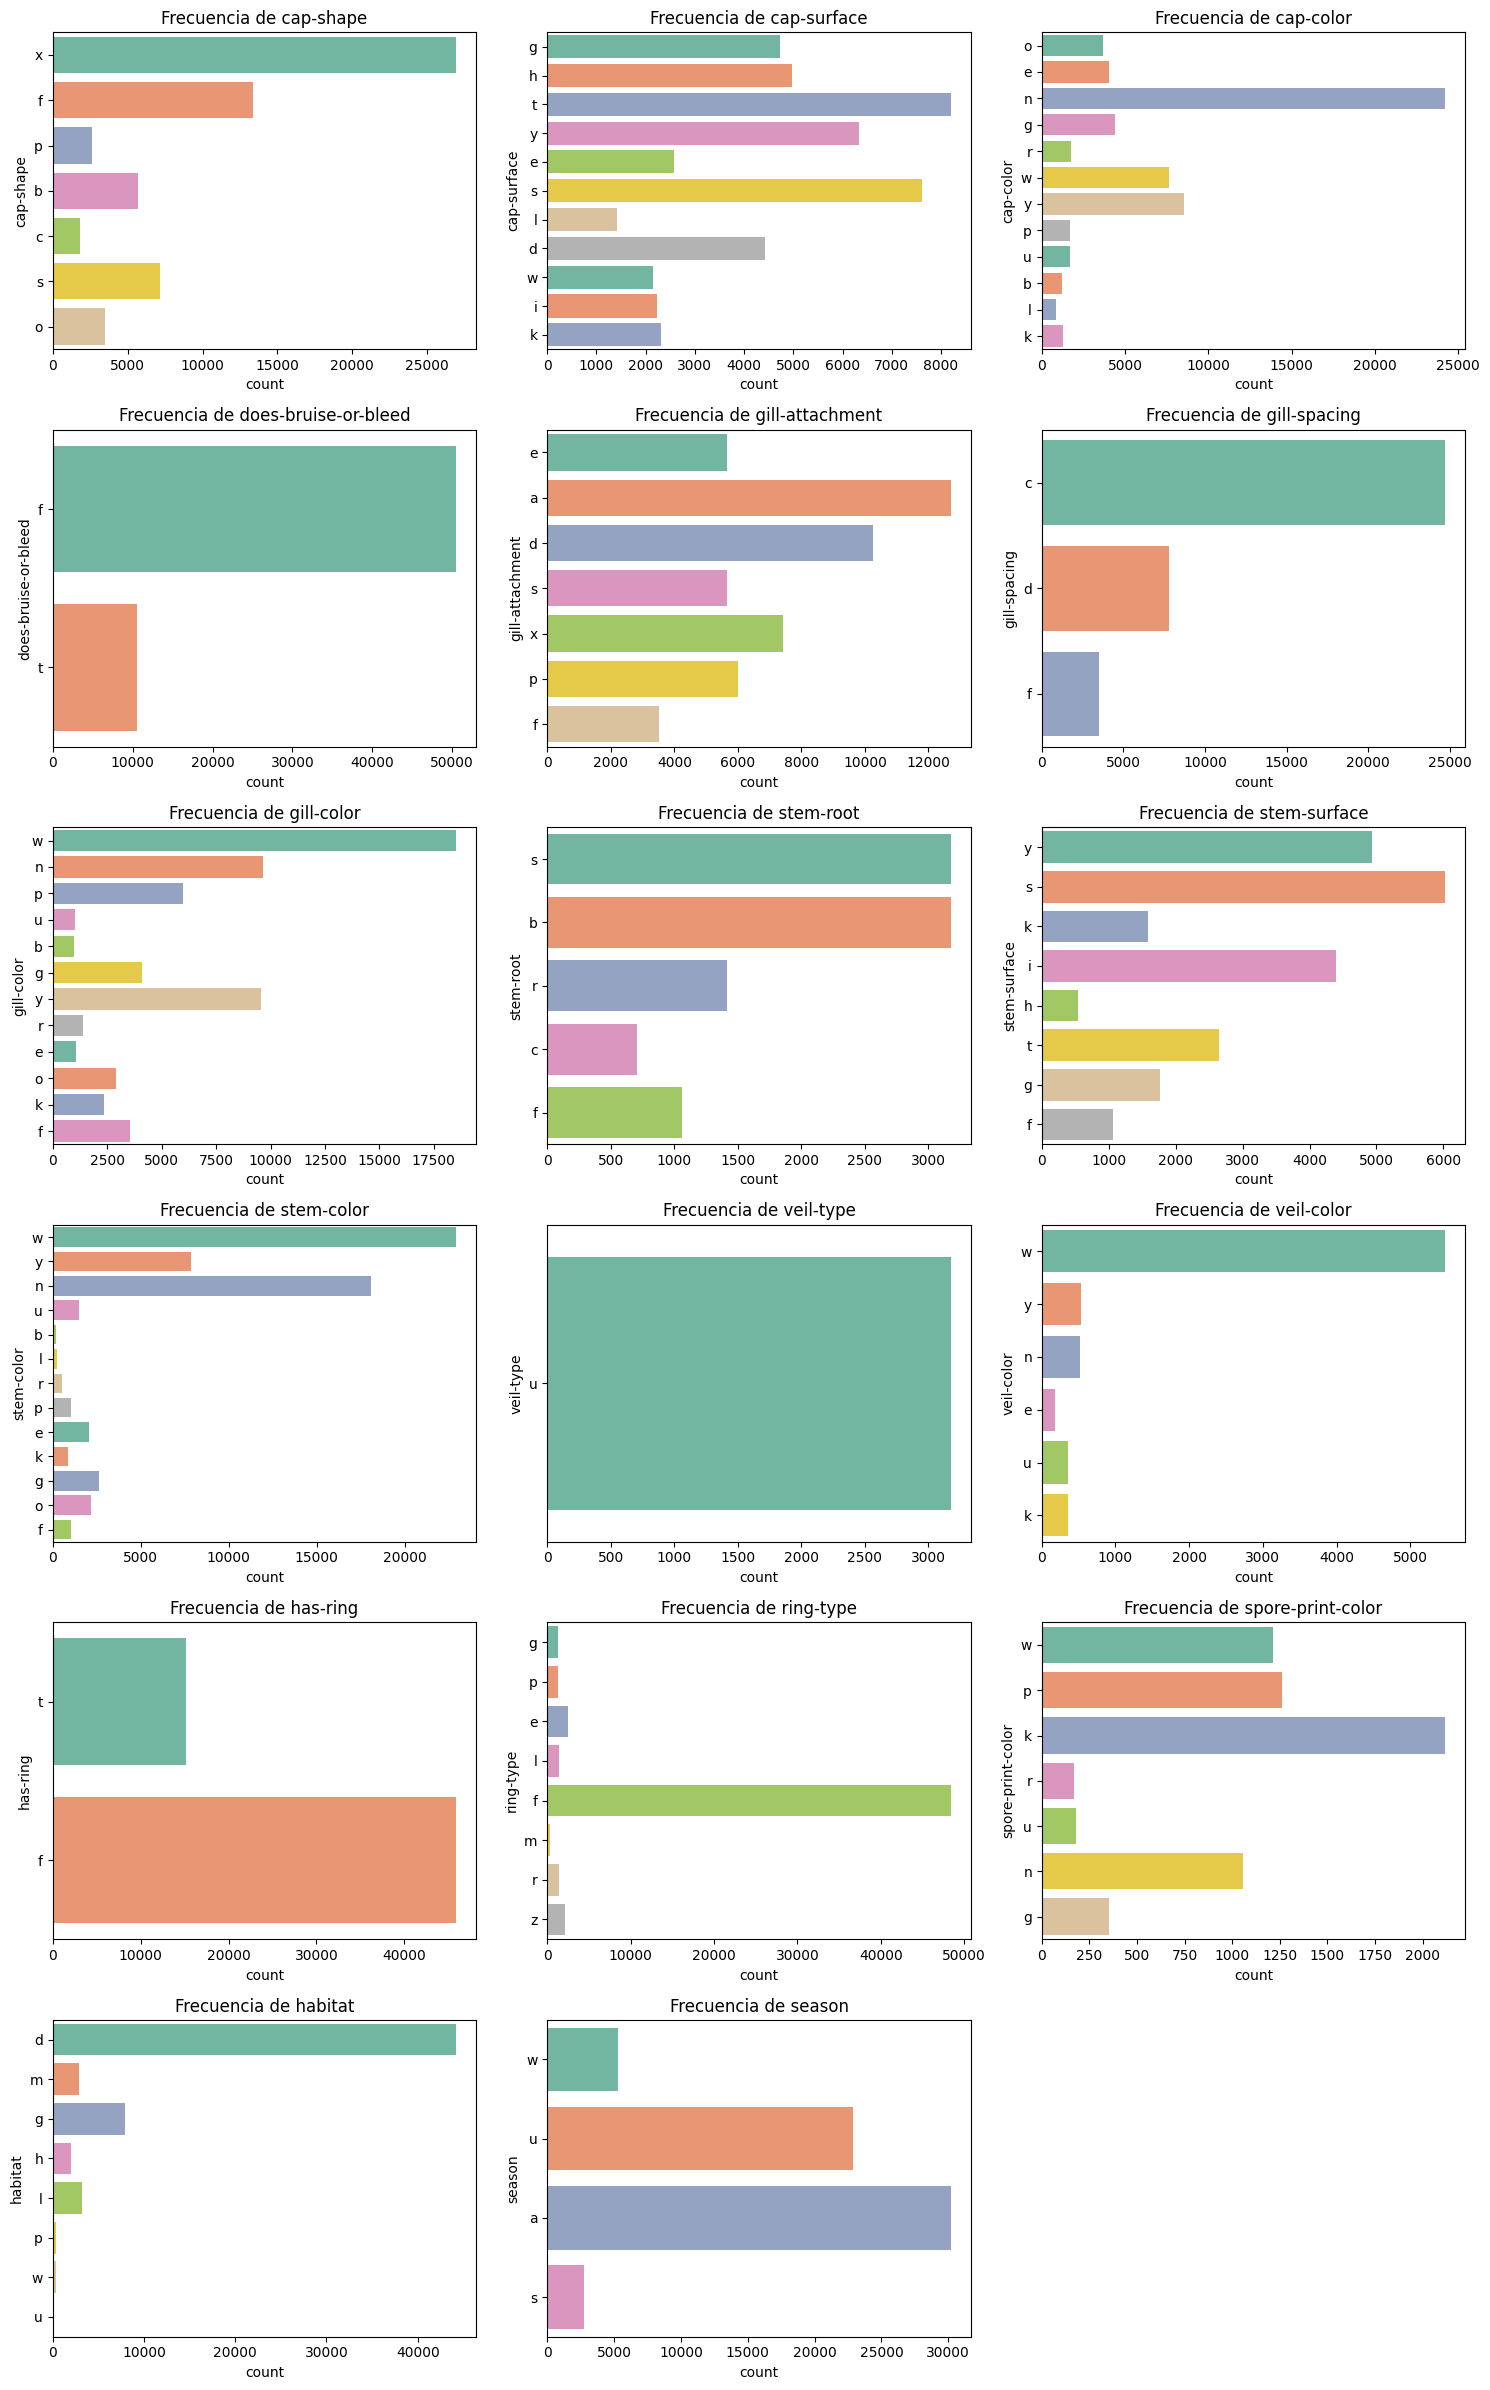

In [10]:
%%capture --no-display
# Visualiza las frecuencias de las variables categóricas
plot_categorical_frequencies(df_cat, 3)

In [11]:
def dataframe_isnull_table(df):

  """
  Calcula el conteo y porcentaje de valores nulos en un DataFrame.

  Parámetros:
    df: El DataFrame al que se le calcularán los valores nulos.

  Retorno:
    Un DataFrame con el conteo y porcentaje de valores nulos para cada columna, ordenado por porcentaje de forma descendente.
  """

  # Calcular el porcentaje de valores nulos para cada columna
  null_percentage = (df.isnull().sum() / df.shape[0]) * 100

  # Crear una nueva tabla con el conteo y porcentaje de valores nulos
  table_isnull = pd.DataFrame({
    "Conteo": df.isnull().sum(),
    "Porcentaje": null_percentage
  })

  # Ordenar la tabla por el porcentaje de valores nulos en orden descendente
  table_isnull = table_isnull.sort_values(by="Porcentaje", ascending=False)

  return table_isnull


In [12]:
# Imprimimos la tabla de valores nulos para variables categóricas
dataframe_isnull_table(df_cat)

,Conteo,Porcentaje
veil-type,57892,94.797688
spore-print-color,54715,89.595376
veil-color,53656,87.861272
stem-root,51538,84.393064
stem-surface,38124,62.427746
gill-spacing,25063,41.040462
cap-surface,14120,23.121387
gill-attachment,9884,16.184971
ring-type,2471,4.046243
habitat,0,0.000000


Hay 17 variables categóricas con una diversidad de características como forma, color, y presencia de anillos, entre otras. Sin embargo, seis de esas variables presentan más del 40% de sus registros con valores vacíos, por lo que continuaremos a eliminar estas variables.

Por otro lado, las variables *cap-surface* y *gill-attachment* también presentan un porcentaje considerable de registros con valores vacíos, con 23% y 16% respectivamente; no obstante, estas dos variables presentan una variada distribución de sus datos, con un número importante de categorías (11 y 7 categorías respectivamente), lo cual peude enriquecer la diversidad de datos que requiere un modelo de machine learning. Por ello, realizaremos una imputación de valores para estas dos variables.

### Análisis de Variables Numéricas

#### Estadísticas Descriptivas

In [13]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,61069.0,6.733854,5.264845,0.38,3.48,5.86,8.54,62.34
stem-height,61069.0,6.581538,3.370017,0.00,4.64,5.95,7.74,33.92
stem-width,61069.0,12.149410,10.035955,0.00,5.21,10.19,16.57,103.91


Hay 3 columnas numéricas (cap-diameter, stem-height, stem-width) con un rango de valores que sugieren una alta variabilidad en las dimensiones de los hongos estudiados. Por ejemplo, el diámetro del sombrero (cap-diameter) varía desde 0.38 cm hasta 62.34 cm.

#### Visualización de Distribuciones

In [14]:
def plot_numeric_frequencies(dataframe, grid_columns=2):
    """
    Visualiza la frecuencia de variables numéricas usando histogramas en una cuadrícula de plots.
    
    Parámetros:
    - dataframe: DataFrame de pandas que contiene las variables numéricas.
    - grid_columns: Número de columnas en la cuadrícula de impresión de plots.
    """
    # Selecciona solo las variables numéricas
    numeric_vars = dataframe.select_dtypes(include=['int64', 'float64']).columns
    
    # Calcula el número necesario de filas en la cuadrícula, basado en el número de variables y el número de columnas
    grid_rows = len(numeric_vars) // grid_columns + (len(numeric_vars) % grid_columns > 0)
    
    # Configura el tamaño de la figura
    plt.figure(figsize=(15, grid_rows * 4))
    
    # Itera sobre las variables numéricas para crear los plots
    for index, var in enumerate(numeric_vars, 1):
        plt.subplot(grid_rows, grid_columns, index)
        sns.histplot(dataframe[var], kde=True, color='skyblue', bins=50)
        plt.title(f'Distribución de {var}')
        plt.tight_layout()

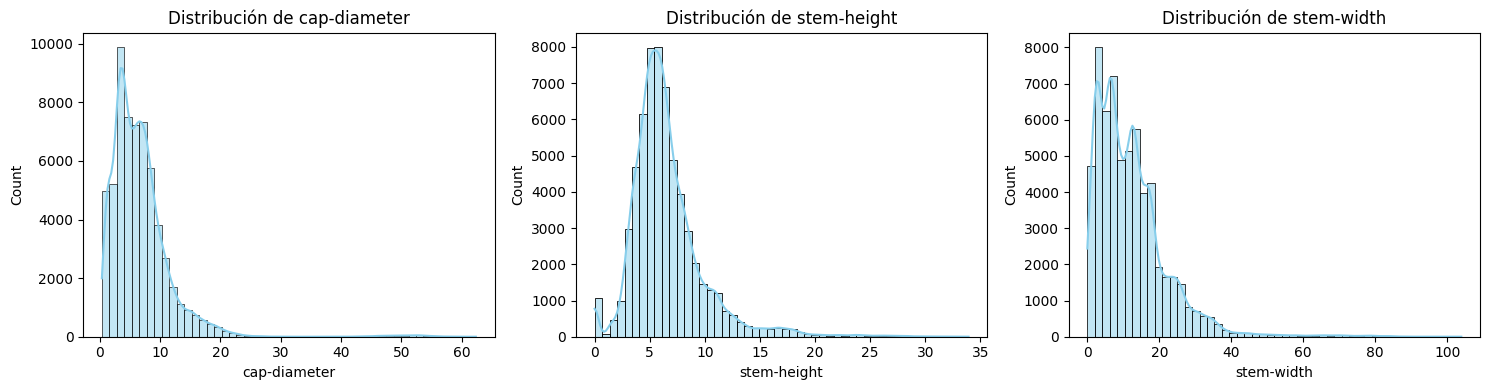

In [15]:
plot_numeric_frequencies(df_num, grid_columns=3)

#### Limpieza de Variables Numéricas

In [16]:
# Imprimimos la tabla de valores nulos para variables numéricas
dataframe_isnull_table(df_num)

,Conteo,Porcentaje
cap-diameter,0,0.0
stem-height,0,0.0
stem-width,0,0.0


#### Detección de Outliers

In [17]:
def detect_outliers_iqr(dataframe):
    """
    Detecta outliers en todas las columnas numéricas de un DataFrame usando el método del rango intercuartílico (IQR).
    
    Parámetros:
    - dataframe: DataFrame de pandas que contiene las variables numéricas.
    
    Retorna:
    - Un DataFrame que contiene solo las filas que son consideradas outliers en alguna de las columnas numéricas.
    """
    outliers_df = pd.DataFrame(columns=dataframe.columns)
    
    # Selecciona solo las columnas numéricas; en caso de que se haya ingresado un DataFrame con columnas categóricas
    numeric_cols = dataframe.select_dtypes(include=['int64', 'float64'])
    
    for column in numeric_cols:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtra los outliers
        filter_outliers = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
        outliers_in_column = dataframe[filter_outliers]
        
        # Agrega los outliers al DataFrame de outliers
        outliers_df = pd.concat([outliers_df, outliers_in_column], axis=0).drop_duplicates().reset_index(drop=True)
    
    return outliers_df


In [18]:
warnings.simplefilter(action='ignore', category=FutureWarning) # Ignorar advertencias de tipo FutureWarning que arroja Pandas

# Ajustando la configuración de Pandas a una precisión de dos decimales, para facilitar la lectura de los resultados
pd.set_option('display.precision', 2)

# Detectando outliers en el DataFrame de variables numéricas
outliers_df = detect_outliers_iqr(df_num)

# Observaciones y conclusiones basadas en el análisis de outliers
outliers_df.describe(include='all'), outliers_df.shape

(       cap-diameter  stem-height  stem-width
 count       5340.00      5340.00     5340.00
 mean          15.81        12.78       28.99
 std           10.68         5.70       16.71
 min            2.51         2.18        5.13
 25%            8.30         7.20       17.07
 50%           14.96        13.02       25.42
 75%           18.54        16.48       36.37
 max           62.34        33.92      103.91,
 (5340, 3))

<Axes: >

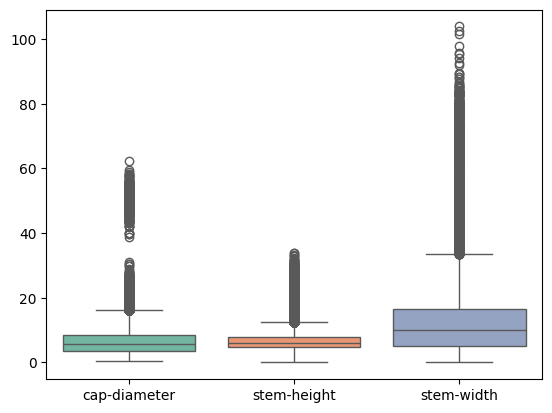

In [19]:
# Visualiza los outliers detectados
sns.boxplot(data=df_num, orient='v', palette='Set2')


El análisis de detección de outliers mediante el método del rango intercuartílico (IQR) en las variables numéricas (cap-diameter, stem-height, stem-width) ha identificado un total de 5,340 filas que contienen al menos un outlier en alguna de estas columnas. Aquí hay un resumen de las observaciones de estos outliers:

Diámetro del sombrero (cap-diameter): Los valores de los outliers varían significativamente, con un promedio de aproximadamente 15.81 cm y un rango que va desde 2.51 cm hasta 62.34 cm, lo que indica que hay hongos con sombreros excepcionalmente grandes y pequeños en comparación con la distribución general.

Altura del tallo (stem-height): La altura de los tallos de los outliers tiene un promedio de 12.78 cm, con un rango desde 2.18 cm hasta 33.92 cm, señalando la presencia de hongos con tallos excepcionalmente altos o cortos.

Ancho del tallo (stem-width): Los outliers en el ancho del tallo tienen un promedio de 28.99 cm, extendiéndose desde 5.13 cm hasta 103.91 cm, lo que sugiere que algunos hongos tienen tallos mucho más anchos que la mayoría.

La existencia de outliers puede ser indicativa de subpoblaciones dentro del data set. La presencia de outliers en las medidas físicas de los hongos (diámetro del sombrero, altura y ancho del tallo) destaca la variabilidad extrema en las características físicas de los hongos en este conjunto de datos. También podemos observar que la mayoría de outliers se encuentran por encima del límite superior de las tres variables numéricas, lo cual nos indica que, si bien la mayoría de hongos tienen un tamaño relativamente chico, no sería extraño encontrar algunos hongos con tamaños bastante superiores al resto de la población de hongos.

### Relaciones entre Variables

#### Correlaciones

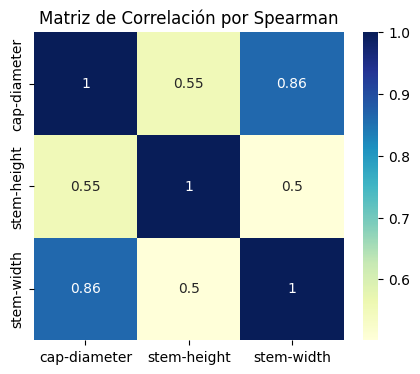

In [20]:
corr = df.select_dtypes(include=["number"]).corr(method="spearman")
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Matriz de Correlación por Spearman")
plt.show()


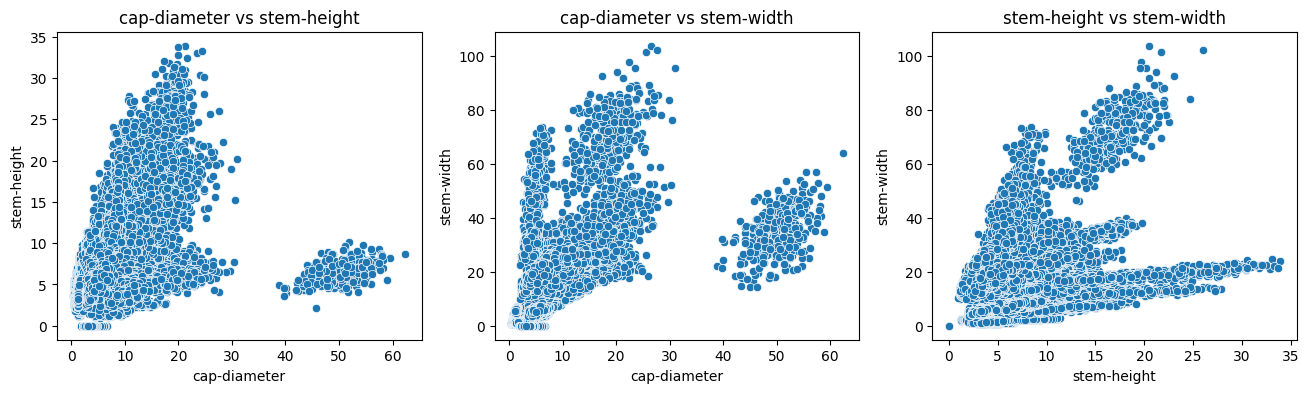

In [21]:
def scatterplots_matriz(df, grid_columns=3):
    """
    Genera scatterplots para cada par de variables numéricas en un DataFrame.
    
    Parámetros:
    df (pandas.DataFrame): DataFrame que contiene las variables numéricas.
    grid_columns (int): Número de columnas en la cuadrícula de scatterplots.
    
    Retorna:
    None (Muestra los scatterplots en una cuadrícula de subplots)
    """
    # Seleccionar solo las variables numéricas
    numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Calcular el número de filas necesarias para la cuadrícula
    num_plots = len(numeric_vars) * (len(numeric_vars) - 1) // 2
    grid_rows = num_plots // grid_columns + (num_plots % grid_columns > 0)
    
    # Configurar el tamaño de la figura
    fig, axes = plt.subplots(nrows=grid_rows, ncols=grid_columns, figsize=(16, grid_rows * 4))
    
    # Iterar sobre cada par de variables numéricas
    for i, (var1, var2) in enumerate(combinations(numeric_vars, 2)):
        row = i // grid_columns
        col = i % grid_columns
        
        # Crear el scatterplot
        if grid_rows == 1:
            ax = axes[col]
        else:
            ax = axes[row, col]
        
        sns.scatterplot(data=df, x=var1, y=var2, ax=ax)
        ax.set_title(f"{var1} vs {var2}")
        ax.set_xlabel(var1)
        ax.set_ylabel(var2)
    
    # Ajustar el espaciado entre subplots
    plt.subplots_adjust(hspace=0.5)
    
    # Mostrar la figura
    plt.show()

scatterplots_matriz(df_num, grid_columns=3)

Analizamos la correlación entre las variables numéricas, para ello usamos el método de Spearman debido a que las tres variables presentan un número considerable de outliers. Podemos observar que las correlaciones entre las tres variables numéricas son positivas, sin embargo, la correlación más fuerte se encuentra entre Diámetro de Sombrero (*cap-diameter*) y Ancho de Tallo (*stem-width*); es decir, mientras más grande sea el sombrero de un hongo, más grande va a tender a ser su tallo. Sin embargo, es importante mencionar que existen algunos outliers en esta distribución.

Por otro lado, la distribución de Altura de Tallo con las otras dos variables es débil, podríamos considerar eliminar variable.

In [22]:
%%capture --no-display
def cramers_v(x, y):
    """
    Calcula la Correlación de Cramer corregida entre dos variables categóricas.
    
    La Correlación de Cramer es una medida de asociación entre dos variables categóricas, dando
    un valor entre 0 y 1 donde 0 significa sin asociación y 1 significa asociación perfecta.
    
    Esta versión corregida de la Correlación de Cramer ajusta por sesgo de tamaño de muestra
    y asegura que la correlación de una variable consigo misma es siempre 1. También maneja
    el caso donde la división por cero podría ocurrir durante el cálculo.
    
    Parámetros:
    - x (pd.Series): Una variable categórica del DataFrame.
    - y (pd.Series): Otra variable categórica del DataFrame.
    
    Retorna:
    - float: El valor de la Correlación de Cramer corregida entre x e y.
    
    Notas:
    - En el caso de una división por cero debido a una tabla de contingencia degenerada
      (por ejemplo, con una sola fila o columna), la función retorna 0 en lugar de producir
      un error o un valor indefinido.
    """
    if x.equals(y):
        return 1.0
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    # Evitar división por cero
    denom = min((kcorr-1), (rcorr-1))
    if denom == 0:
        return 0
    else:
        return np.sqrt(phi2corr / denom)

# Aplicación de la Correlación de Cramer a todas las combinaciones de variables categóricas, incluyendo la variable objetivo
df_cat_and_target = pd.concat([df_cat, df['class']], axis=1)
categorical_vars = df_cat_and_target.columns
cramers_matrix = pd.DataFrame(np.zeros((len(categorical_vars), len(categorical_vars))), index=categorical_vars, columns=categorical_vars)

for col1 in categorical_vars:
    for col2 in categorical_vars:
        cramers_matrix.loc[col1, col2] = cramers_v(df_cat_and_target[col1], df_cat_and_target[col2])

# Visualización con Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap de Correlación de Cramer entre Variables Categóricas')
plt.show()

NameError: name 'np' is not defined

#### Observaciones del Heatmap de Correlación de Cramer

1. La variable "veil-type" (tipo de velo) tiene una correlación de cero con todas las otras variables, incluyendo la variable objetivo "class" (clase). Esto sugiere que "veil-type" podría no ser informativa para predecir el objetivo y podría ser excluida del conjunto de características.
2. Las variables "stem-root" (raíz del tallo), "veil-color" (color del velo), y "spore-print-color" (color de la impresión de esporas) tienen correlaciones relativamente fuertes con la variable objetivo "class" (0.57, 0.50, y 0.58, respectivamente). Estas variables podrían ser predictores importantes y probablemente deberían ser incluidas en el modelo.
3. Las correlaciones entre "cap-surface" (superficie del sombrero), "cap-color" (color del sombrero), "gill-attachment" (unión de las láminas), "stem-surface" (superficie del tallo), "stem-color" (color del tallo) y "ring-type" (tipo de anillo) con la variable objetivo son moderadas (van de 0.20 a 0.38). Estas variables aún podrían ser informativas para predecir el objetivo, pero su importancia podría ser menor en comparación con variables como "stem-root", "veil-color", y "spore-print-color".
4. Las variables "has-ring" (tiene anillo), "ring-type" (tipo de anillo) y "spore-print-color" (color de la impresión de esporas) están fuertemente correlacionadas entre sí (correlaciones que van de 0.53 a 0.87). Esto sugiere que estas variables podrían contener información redundante, podemos considerar combinarlas en una sola característica o seleccionar una de ellas como representativa.
5. Las variables "gill-attachment" (unión de las láminas), "gill-spacing" (espaciado de las láminas), "gill-color" (color de las láminas), "stem-root" (raíz del tallo) y "stem-surface" (superficie del tallo) están fuertemente correlacionadas entre sí (correlaciones que van de 0.40 a 0.78). Esto sugiere que estas variables podrían contener información redundante, podemos considerar combinarlas en una sola característica o seleccionar una de ellas como representativa.
6. Las variables "has-ring" (tiene anillo) y "ring-type" (tipo de anillo) tienen una correlación de 0.87, indicando una fuerte relación. Podemos combinarlas en una sola variable o seleccionar una de ellas como representativa.
7. Las variables "stem-root" (raíz del tallo) y "spore-print-color" (color de la impresión de esporas) tienen una correlación de 0.80, indicando una fuerte relación. Podemos combinarlas en una sola variable o seleccionar una de ellas como representativa.
8. Las variables "stem-root" (raíz del tallo) y "stem-surface" (superficie del tallo) tienen una correlación de 0.78, indicando una fuerte relación. Podemos combinarlas en una sola variable o seleccionar una de ellas como representativa.
9. Las variables "gill-attachment" (unión de las láminas) y "gill-spacing" (espaciado de las láminas) tienen una correlación de 0.74, indicando una fuerte relación. Podemos combinarlas en una sola variable o seleccionar una de ellas como representativa.
10. La variable "does-bruise-or-bleed" no tiene correlación con la variable objetivo (0.02), y solamente mantiene una fuerta correlación con la variable "veil-color".
11. La variable "season" tiene una correlación mínima con la variable objetivo (0.12), y su correlación más alta es con la variable "stem-root", la cual también relativamente baja (0.21).

### Análisis Avanzado

#### Selección de características

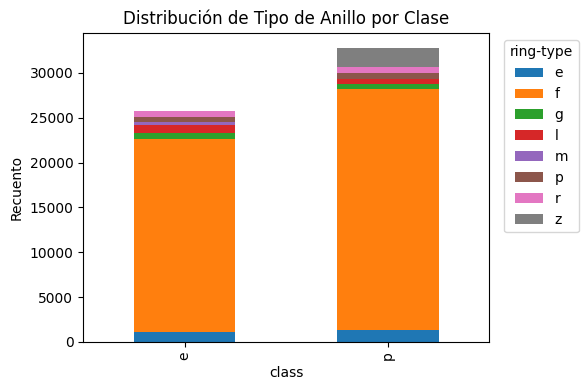

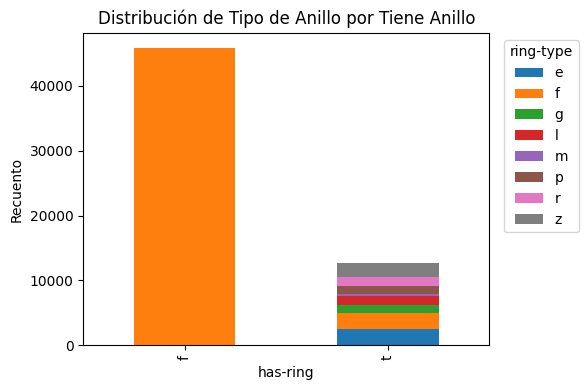

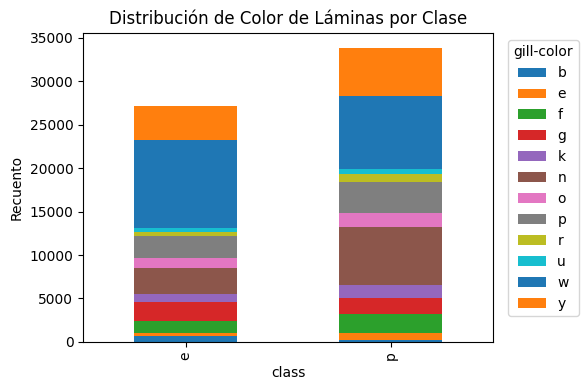

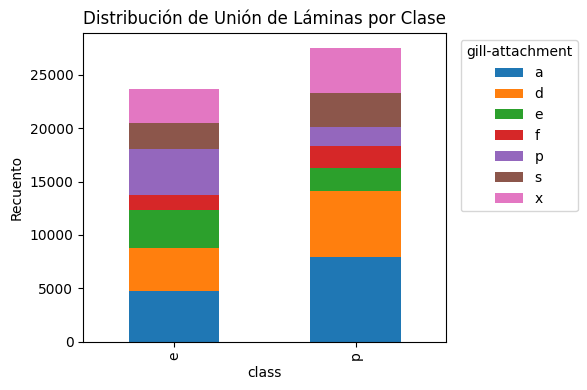

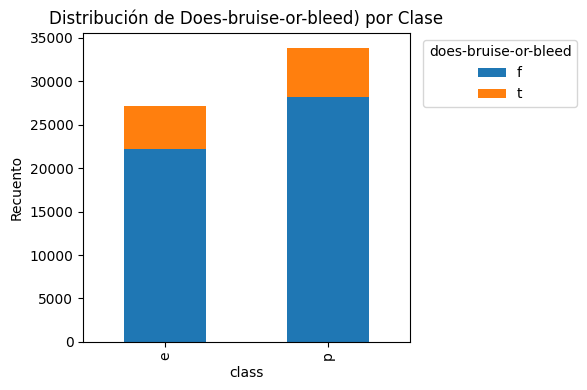

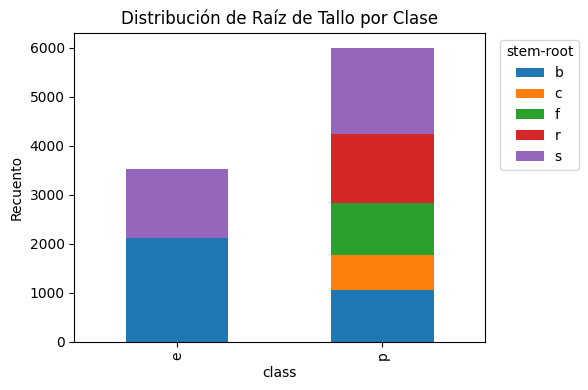

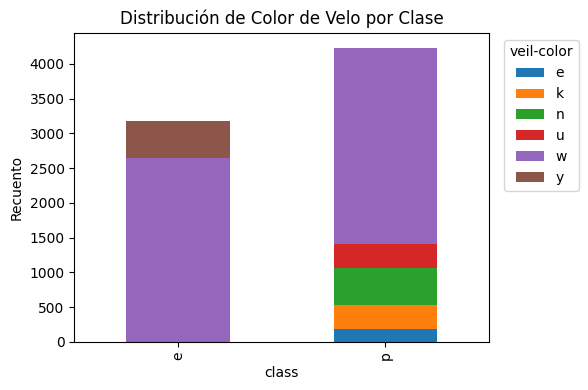

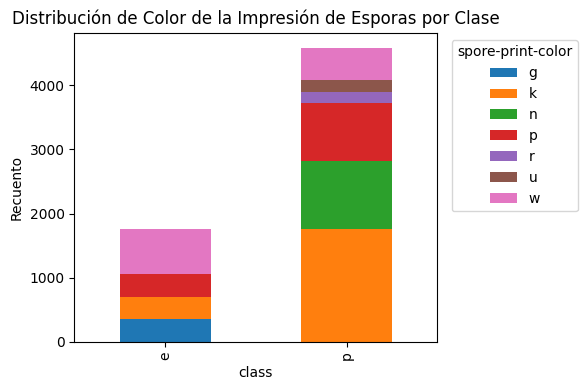

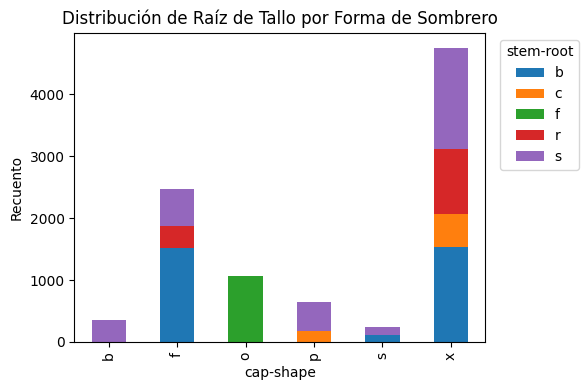

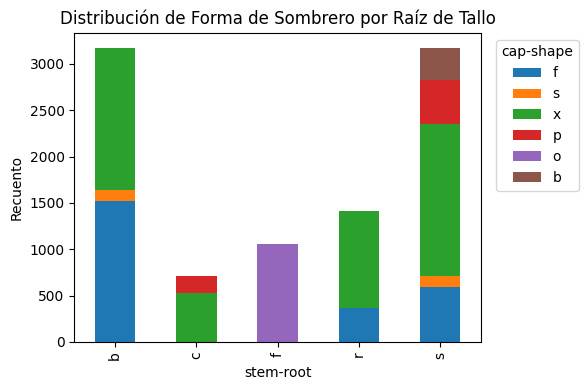

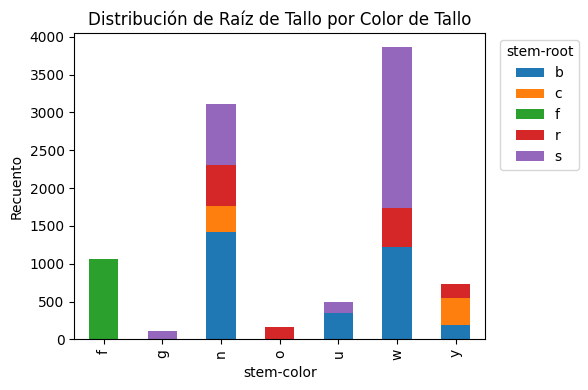

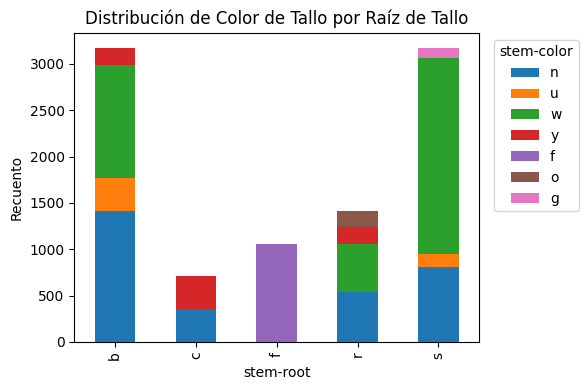

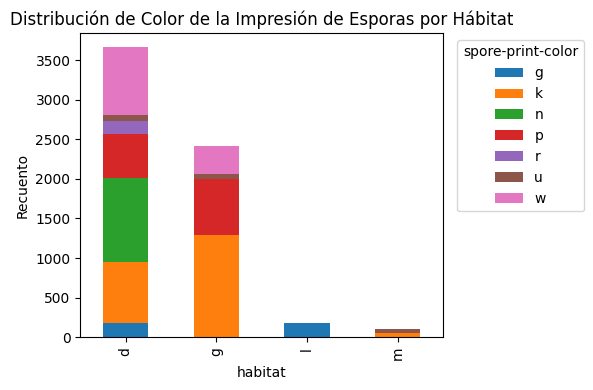

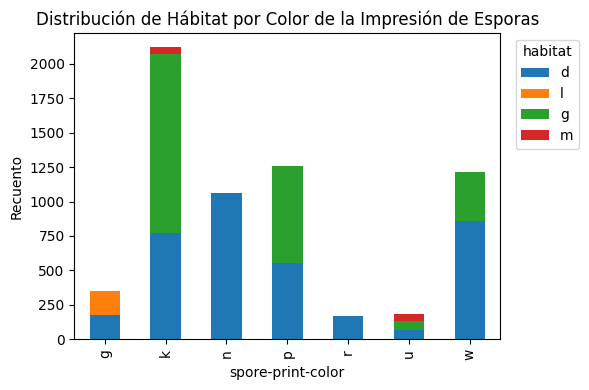

In [23]:
def plot_categorical_bars(df, x, y, hue, title):
    """
    Crea un gráfico de barras apiladas para visualizar la relación entre dos variables categóricas.
    
    Parámetros:
    df (pandas.DataFrame): DataFrame que contiene las variables.
    x (str): Nombre de la variable categórica para el eje x.
    y (str): Nombre de la variable numérica para el eje y.
    hue (str): Nombre de la variable categórica para agrupar las barras.
    title (str): Título del gráfico.
    
    Retorna:
    None (Muestra el gráfico de barras apiladas)
    """
    # Calcular los recuentos agrupados
    counts = df.groupby([x, hue])[y].count().unstack(hue)
    
    # Crear el gráfico de barras apiladas
    counts.plot(kind='bar', stacked=True, figsize=(6, 4))
    
    # Personalizar el gráfico
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel('Recuento')
    plt.legend(title=hue, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso
plot_categorical_bars(df, x='class', y='class', hue='ring-type', title='Distribución de Tipo de Anillo por Clase')
plot_categorical_bars(df, x='has-ring', y='has-ring', hue='ring-type', title='Distribución de Tipo de Anillo por Tiene Anillo')
plot_categorical_bars(df, x='class', y='class', hue='gill-color', title='Distribución de Color de Láminas por Clase')
plot_categorical_bars(df, x='class', y='class', hue='gill-attachment', title='Distribución de Unión de Láminas por Clase')
plot_categorical_bars(df, x='class', y='class', hue='does-bruise-or-bleed', title='Distribución de Does-bruise-or-bleed) por Clase')
plot_categorical_bars(df, x='class', y='class', hue='stem-root', title='Distribución de Raíz de Tallo por Clase')
plot_categorical_bars(df, x='class', y='class', hue='veil-color', title='Distribución de Color de Velo por Clase')
plot_categorical_bars(df, x='class', y='class', hue='spore-print-color', title='Distribución de Color de la Impresión de Esporas por Clase')
plot_categorical_bars(df, x='cap-shape', y='cap-shape', hue='stem-root', title='Distribución de Raíz de Tallo por Forma de Sombrero')
plot_categorical_bars(df, x='stem-root', y='stem-root', hue='cap-shape', title='Distribución de Forma de Sombrero por Raíz de Tallo')
plot_categorical_bars(df, x='stem-color', y='stem-color', hue='stem-root', title='Distribución de Raíz de Tallo por Color de Tallo')
plot_categorical_bars(df, x='stem-root', y='stem-root', hue='stem-color', title='Distribución de Color de Tallo por Raíz de Tallo')
plot_categorical_bars(df, x='habitat', y='habitat', hue='spore-print-color', title='Distribución de Color de la Impresión de Esporas por Hábitat')
plot_categorical_bars(df, x='spore-print-color', y='spore-print-color', hue='habitat', title='Distribución de Hábitat por Color de la Impresión de Esporas')


1. Los gráficos "Distribución de tipo de aro (ring-type) por clase" y "Distribución de tipo de aro (ring-type) por has-ring" nos permiten confirmar que la información que la variable "has-ring" aporta a la predicción de la variable objetivo se encuentra anidada en la variable "ring-type", por lo que de forma confiable podemos eliminar la variable "has-ring" e incluir "ring-type".
2. Gracias al gráfico "Distribución de tipo de aro (*ring-type*) por clase", podemos observar que cualquier tipo de hongo con tipo de aro 'm' (*movable*) es comestible, mientras que cualquier tipo de hongo con tipo de aro 'z' (*zone*) es venenoso.
3. El gráfico "Distribución de (does-bruise-or-bleed) por clase" nos permite confirmar que la distribución por clase de la variable binaria (*does-bruise-bleed*) es bastante pareja, por lo cual aportaría poco a un modelo de clasificación de si un hongo es comestible o venenoso.
4. Las variables "stem-root", "veil-color" y "spore-print-color" mantienen al menos alguna clase que pertenece exclusivamente a hongos venenosos, lo cual confirma la importancia de estas variables para predecir la variable objetivo.
5. La distribución entre el par de variables 'cap-shape' y 'stem-root'; 'stem-color' y 'stem-root'; y 'habitat' y 'spore-print-color', nos demuestra que no debemos eliminar alguna de estas variables ya que la información de ninguna está completamente anidada en la otra, sin embargo, sí exista una distribución desbalanceada, lo cual indica que podemos generar una variable combinada para reducir la dimensionalidad del modelo y aún así mantener la información que estos pares de variables aportan a la predicción de la variable objetivo.

#### Insights para la Ingeniería de Variables

1. Excluir "veil-type" del conjunto de características debido a su falta de correlación con otras variables y el objetivo.
2. Excluir "does-bruise-or-bleed" del conjunto de características debido a su falta de correlación con la variable objetivo; asumiendo que se incluirá la variable "veil-color".
3. Excluir "season" del conjunto de características debido a su falta de correlación con otras variables y el objetivo.
4. Priorizar la inclusión de  "stem-root", "veil-color", y "spore-print-color" como variables individuales en el modelo.
5. Combinar o seleccionar características representativas de los siguientes grupos:
- "has-ring", "ring-type" y "spore-print-color"         # "spore-print-color" tiene mayor correlación directa con la variable objetivo
- "gill-attachment", "gill-spacing", "gill-color", "stem-root" y "stem-surface"         # "stem-root" tiene mayor correlación directa con la variable objetivo
- "stem-root" y "spore-print-color"                     # "spore-print-color" tiene mayor correlación directa con la variable objetivo; pero ambas tienen relativamente alta correlación con la variable objetivo
- "stem-root" y "stem-surface"                          #  "stem-root" tiene mayor correlación directa con la variable objetivo
- "gill-attachment" y "gill-spacing"                    # "gill-attachment" tiene mayor correlación directa con la variable objetivo
6. Considerar incluir "cap-surface", "cap-color", "gill-attachment", "stem-surface", "stem-color" y "ring-type" como características individuales, teniendo en cuenta que su importancia podría ser menor en comparación con otras variables.

#### Variables a incluir

1. cap-diameter          61069 non-null  float64    # PRIORIDAD MANTENER
2. cap-shape             61069 non-null  object     # DECIDIR ENTRE INCLUIR, ELIMINAR O GENERAR COMBINACION CON 'stem-root'. DECIDIMOS ELIMINAR PARA NO AFECTAR VARIABLE PRIORITARIA.
3. cap-surface           46949 non-null  object     # PRIORIDAD MEDIA
4. cap-color             61069 non-null  object     # PRIORIDAD MEDIA
5. does-bruise-or-bleed  61069 non-null  object     # ELIMINAR
6. gill-attachment       51185 non-null  object     # PRIORIDAD MEDIA; ¿COMBINAR CON 'stem-surface' O MANTENER INDEPENDIENTE?
7. gill-spacing          36006 non-null  object     # ELIMINAR, SE MANTIENE 'gill-attachment'
8. gill-color            61069 non-null  object     # ELIMINAR, SE MANTIENE 'gill-attachment'
9. stem-height           61069 non-null  float64    # ELIMINAR
10. stem-width            61069 non-null  float64   # PRIORIDAD MANTENER
11. stem-root             9531 non-null   object    # PRIORIDAD MANTENER; TIENE POCAS OBSERVACIONES, CONSIDERAR REALIZAR UNA IMPUTACIÓN AVANZADA
12. stem-surface          22945 non-null  object    # PRIORIDAD MEDIA; ¿COMBINAR CON 'gill-attachment' O MANTENER INDEPENDIENTE?
13. stem-color            61069 non-null  object    # DECIDIR ENTRE INCLUIR, ELIMINAR O GENERAR COMBINACION CON 'stem-root'. DECIDIMOS ELIMINAR PARA NO AFECTAR VARIABLE PRIORITARIA.
14. veil-type             3177 non-null   object 
15. veil-color            7413 non-null   object    # PRIORIDAD MANTENER; TIENE POCAS OBSERVACIONES, CONSIDERAR REALIZAR UNA IMPUTACIÓN AVANZADA
16. has-ring              61069 non-null  object    # PRIORIDAD MEDIA
17. ring-type             58598 non-null  object    # ELIMINAR
18. spore-print-color     6354 non-null   object    # PRIORIDAD MANTENER; TIENE POCAS OBSERVACIONES, CONSIDERAR REALIZAR UNA IMPUTACIÓN AVANZADA
19. habitat               61069 non-null  object    # DECIDIR ENTRE INCLUIR, ELIMINAR O GENERAR COMBINACION CON 'spore-print-color'. DECIDIMOS ELIMINAR PARA NO AFECTAR VARIABLE PRIORITARIA.
20. season                61069 non-null  object    # ELIMINAR

In [24]:
features_to_keep = ['cap-diameter', 'cap-surface', 'cap-color', 'gill-attachment', 'stem-width', 'stem-root', 'stem-surface', 'veil-color', 'ring-type', 'spore-print-color']
features_to_drop = ['cap-shape', 'does-bruise-or-bleed', 'gill-spacing', 'gill-color', 'stem-height', 'stem-color', 'ring-type', 'habitat', 'season']

### Observaciones Importantes

- La alta cantidad de valores faltantes en algunas variables sugiere la necesidad de técnicas de imputación o el enfoque en un subconjunto de características más completas para análisis predictivos.
- La diversidad en la distribución de características físicas ofrece una amplia base para análisis exploratorios y modelado predictivo.
- La proporción de hongos venenosos frente a comestibles resalta la importancia de un análisis cuidadoso para aplicaciones prácticas en identificación y consumo seguro de hongos.

### Preguntas

- ¿Qué factores influyen en la variable objetivo?
- ¿Cómo influyen las características físicas de los hongos en su comestibilidad o toxicidad?
- ¿Existen patrones o combinaciones de características que sean indicativos de toxicidad?
- ¿Podemos mejorar el desempeño de los modelos predictivos reduciendo la dimensionalidad de los datos?

### **¿Podemos determinar si un hongo es comestible basándonos en sus características físicas?**

#### Razones para Elegir Esta Pregunta

1. Impacto Práctico y Relevancia: La distinción entre hongos venenosos y comestibles es de vital importancia para la salud pública, la recolección de hongos silvestres y la micología (la rama de la biología que estudia el reino fungi). Un modelo predictivo preciso puede servir como una herramienta valiosa para educar al público, ayudar a los recolectores de hongos y contribuir a la investigación científica.

2. Disponibilidad de Datos: El conjunto de datos incluye una amplia variedad de características físicas de los hongos, como el color, la forma y el tamaño de diferentes partes del hongo. Esta variedad de datos ofrece una excelente oportunidad para entrenar modelos de *machine learning* capaces de capturar patrones complejos asociados con la comestibilidad o toxicidad de los hongos.

3. Desafío Analítico: La tarea implica clasificación binaria, un problema fundamental en el aprendizaje supervisado. Esto brinda la oportunidad de aplicar, comparar y evaluar varios algoritmos de aprendizaje automático, desde métodos lineales hasta modelos más complejos como modelos ensamblados o redes neuronales.

4. Potencial de Impacto Educativo y de Investigación: Desarrollar un modelo predictivo confiable para esta pregunta no solo tiene aplicaciones prácticas sino que también puede impulsar la investigación adicional en micología y ciencia de datos. Además, el proceso de modelado puede revelar *insights* sobre qué características son más predictivas de la toxicidad de los hongos, contribuyendo al conocimiento científico en el campo.

5. Interés Comunitario y de Aficionados: La recolección de hongos es una actividad popular en muchas partes del mundo. Un modelo predictivo accesible podría ser una herramienta educativa para entusiastas de la micología, contribuyendo a la seguridad y el disfrute de esta actividad.

En resumen, la pregunta propuesta abarca aspectos importantes de seguridad, ciencia, educación y pasatiempos, aprovechando el potencial de los datos disponibles y las técnicas de aprendizaje automático para abordar un problema práctico y científicamente relevante.